<a href="https://colab.research.google.com/github/amarildo86/islr-python/blob/master/An%C3%A1lise_de_A%C3%A7%C3%B5es_Yahoo_Finance_e_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
inicio = datetime.datetime(2019, 1, 1)
fim = datetime.datetime(2021, 1, 1)

tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB3.SA', 'BBDC3.SA', 'MGLU3.SA', 'VVAR3.SA']

df = pdr.DataReader(tickers, 'yahoo', inicio, fim)['Adj Close']
df.rename(columns={'PETR4.SA': 'PETR4', 'VALE3.SA': 'VALE3', 'ITUB3.SA': 'ITUB3', 'BBDC3.SA': 'BBDC3', 'MGLU3.SA': 'MGLU3', 'VVAR3.SA':'VVAR3'}, inplace=True)

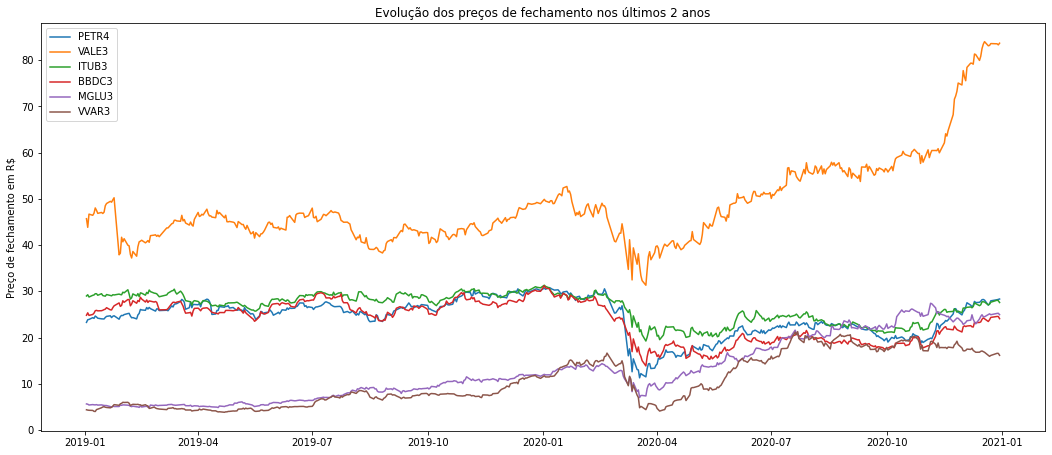

In [72]:
plt.figure(figsize=(18, 7.5))
plt.ylabel('Preço de fechamento em R$')
plt.title('Evolução dos preços de fechamento nos últimos 2 anos')
plt.plot(df)
plt.legend(df.columns)

**Correlação entre as ações**

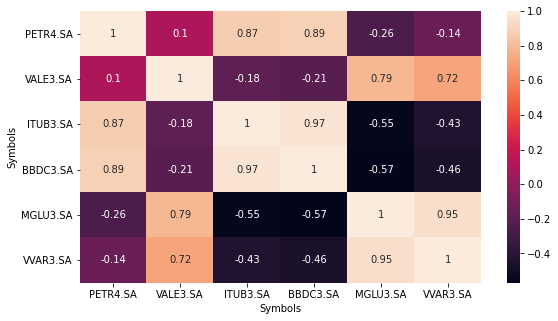

In [41]:
plt.figure(figsize=(9, 5))
sns.heatmap(df['Adj Close'].corr(), annot=True)

**Retorno acumulado (retorno total do período)**

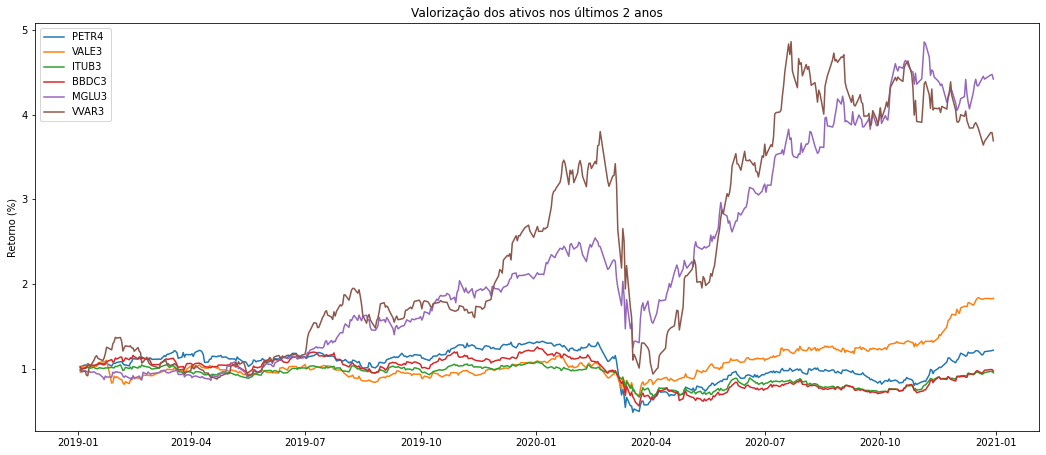

In [73]:
#primeiro precisamos calcular o retorno diário
retorno_diario = pd.DataFrame()
for i in df.columns:
  retorno_diario[i] = df[i].pct_change()

#agora vamos calcular o retorno acumulado
for ticker in df.columns:
  retorno_acum[ticker] = (retorno_diario[ticker] + 1).cumprod()

#exibir o gráfico
plt.figure(figsize=(18, 7.5))
plt.ylabel('Retorno (%)')
plt.title('Valorização dos ativos nos últimos 2 anos')
plt.plot(retorno_acum)
plt.legend(df.columns)